## Import Library dan Upload Dataset

In [ ]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#ML libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('Data_OECD_Project - FIX.csv')

## Eksplorasi Data Awal

In [ ]:
data.head()

,Reference area,Status Area,CO2 emissions from air transport per capita,CO2 emissions from air transport per unit of GDP,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Diesel tax rate,Energy intensity per capita,Renewable energy supply,Threatened bird species,Threatened mammal species,Threatened vascular plant species,Total energy supply
0,Afghanistan,Non OECD,3.33,2.24,87.15,0.92,11.93,0.0,0.00,0.00,0.0,0.0,0.0,0.00
1,Albania,Non OECD,13.82,1.25,0.00,0.00,0.00,0.0,0.76,1071886.37,0.0,0.0,0.0,120.86
2,Algeria,Non OECD,24.76,1.80,21.99,1.74,76.27,0.0,0.00,0.00,0.0,0.0,0.0,0.00
3,Argentina,Non OECD,55.84,6.89,71.40,3.53,25.07,0.0,0.00,0.00,0.0,0.0,0.0,0.00
4,Armenia,Non OECD,16.16,1.11,9.76,81.44,8.80,0.0,0.00,0.00,0.0,0.0,0.0,0.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Reference area                                    55 non-null     object 
 1   Status Area                                       55 non-null     object 
 2   CO2 emissions from air transport per capita       55 non-null     float64
 3   CO2 emissions from air transport per unit of GDP  55 non-null     float64
 4   Consumption of biomass                            55 non-null     float64
 5   Consumption of metals                             55 non-null     float64
 6   Consumption of non-metallic minerals              55 non-null     float64
 7   Diesel tax rate                                   55 non-null     float64
 8   Energy intensity per capita                       55 non-null     float64
 9   Renewable energy supply

## Feature Engnieering

In [ ]:
df_feature = data.copy()

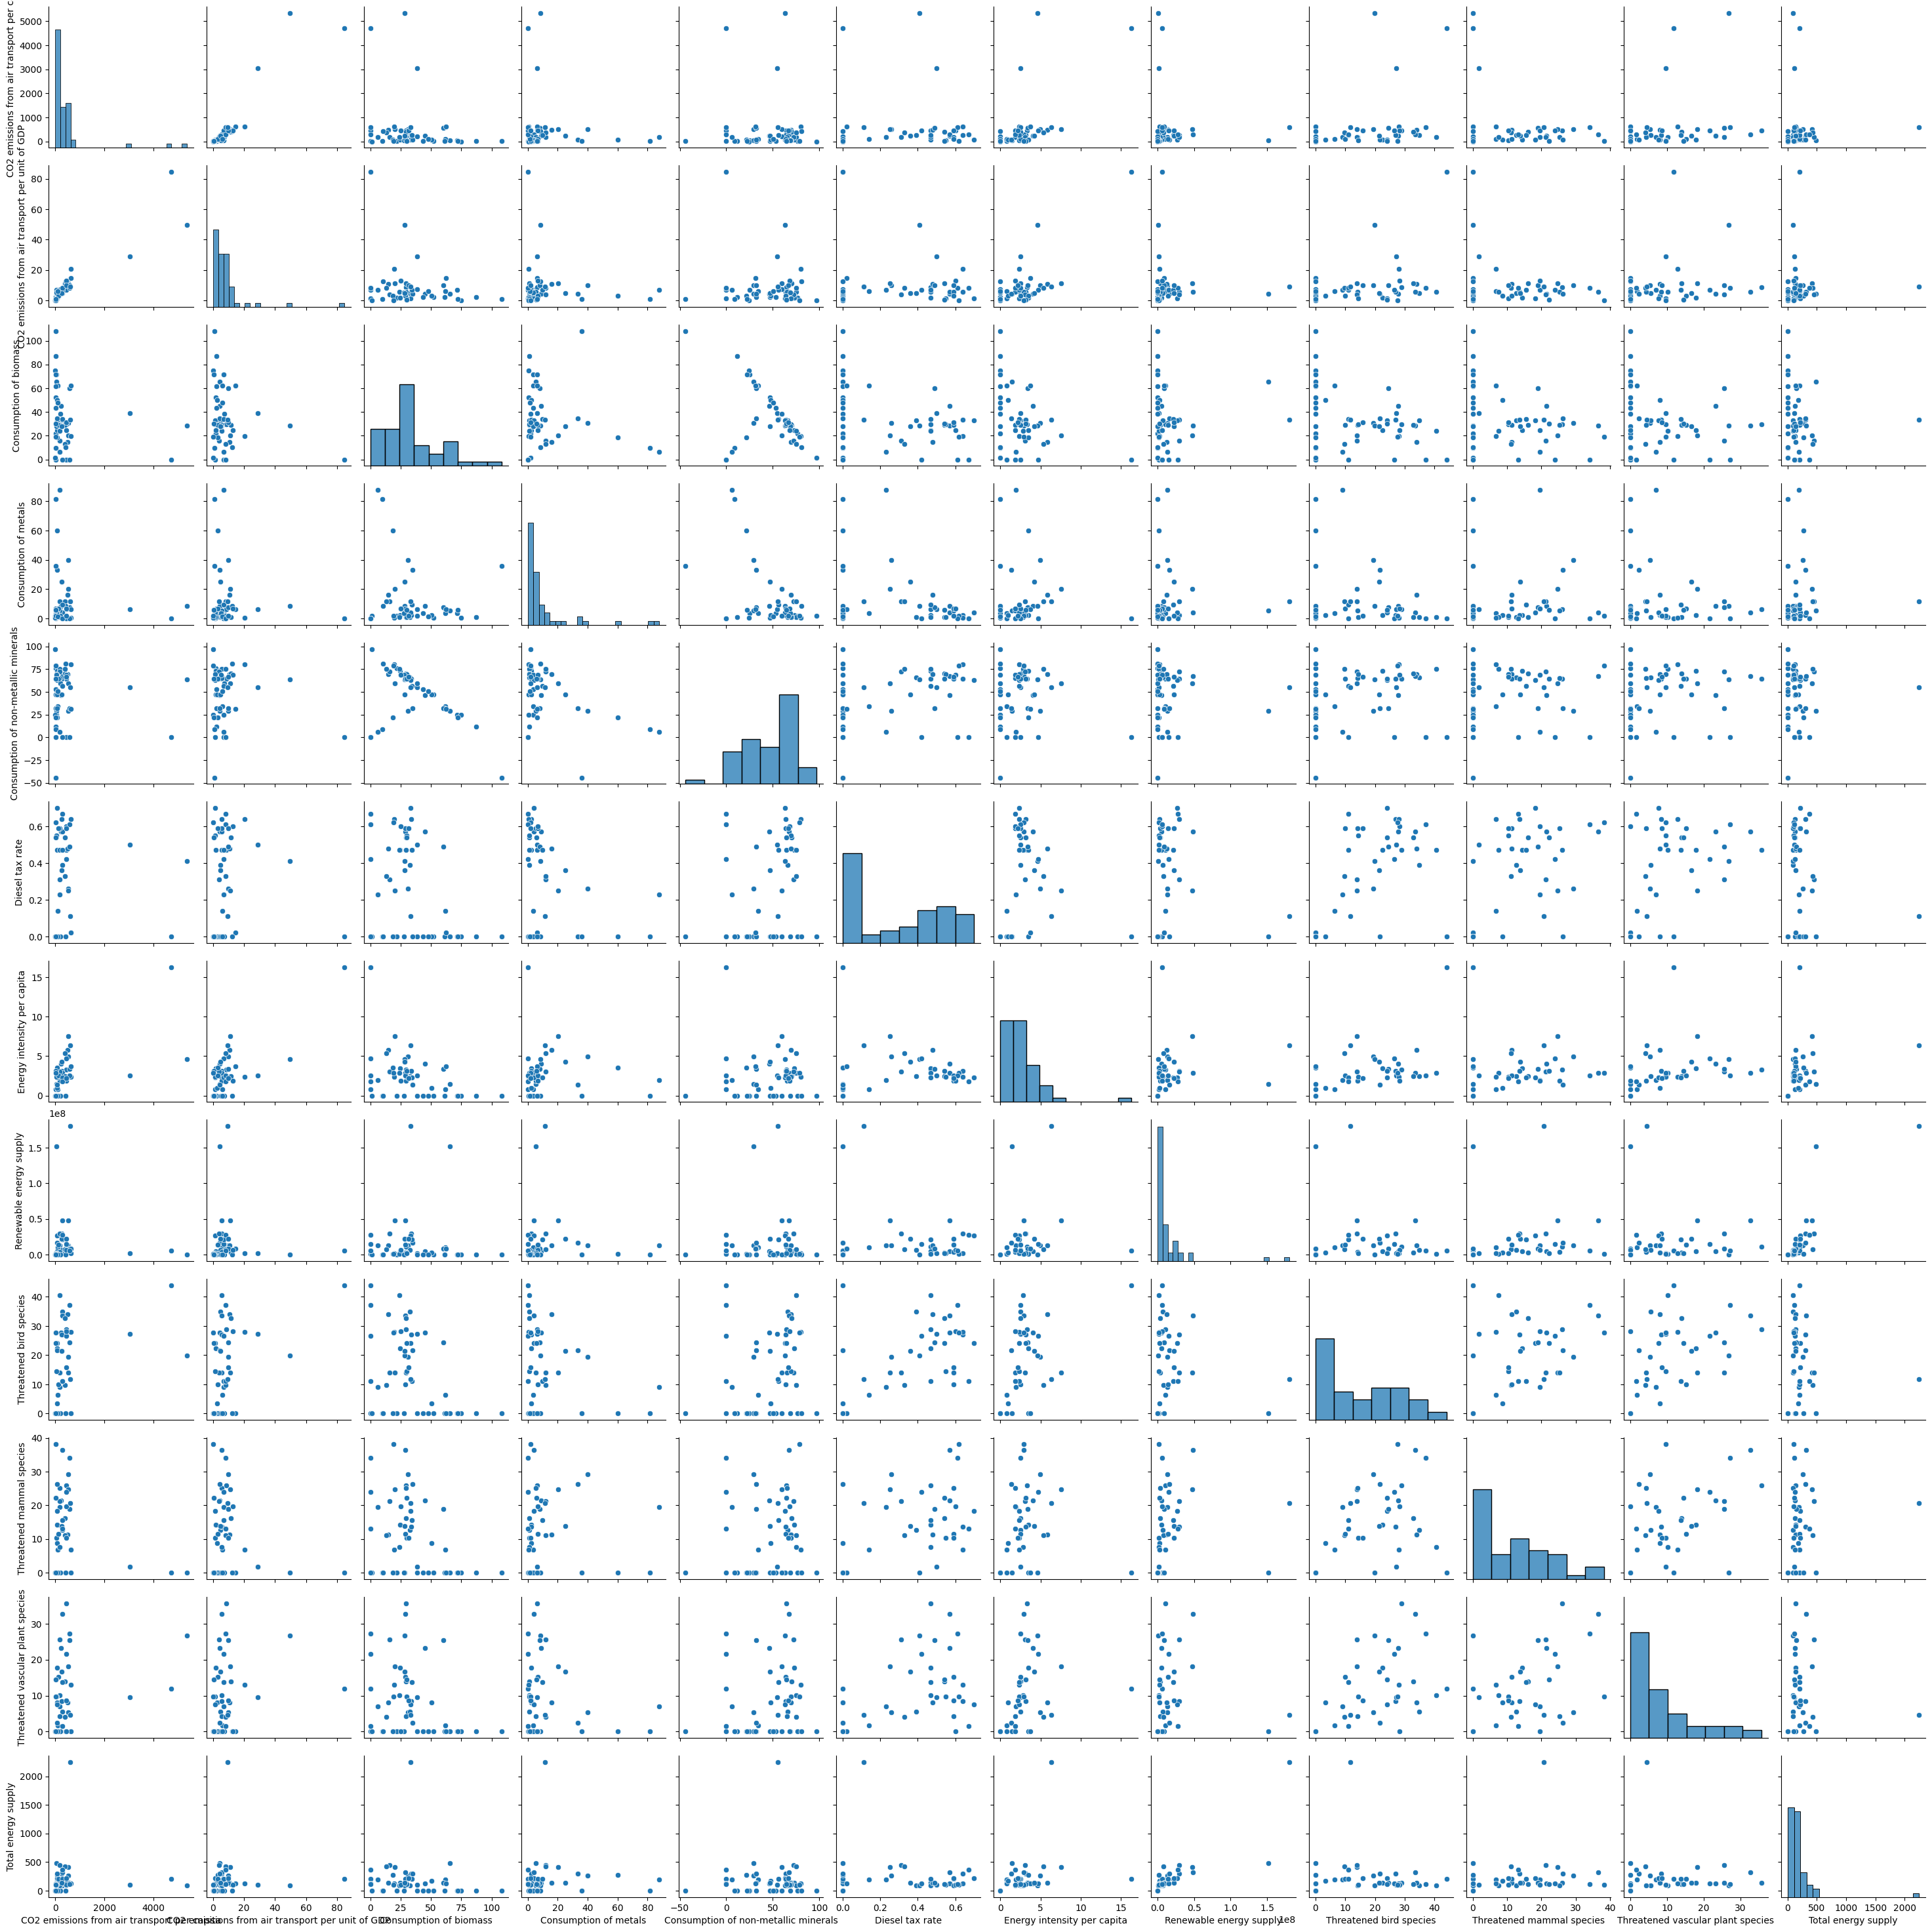

In [ ]:
sns.pairplot(df_feature)

In [ ]:
df_feature = df_feature.drop(['Reference area','Status Area'], axis=1)

In [ ]:
# Normalisasi
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_feature), columns=df_feature.columns)


In [ ]:
df_scaled

,CO2 emissions from air transport per capita,CO2 emissions from air transport per unit of GDP,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Diesel tax rate,Energy intensity per capita,Renewable energy supply,Threatened bird species,Threatened mammal species,Threatened vascular plant species,Total energy supply
0,-0.443482,-0.473536,2.325116,-0.533275,-1.242179,-1.096516,-0.937192,-0.453189,-1.094399,-1.005188,-0.891664,-0.581769
1,-0.432876,-0.550017,-1.446181,-0.583772,-1.666526,-1.096516,-0.649587,-0.419357,-1.094399,-1.005188,-0.891664,-0.190006
2,-0.421816,-0.507528,-0.494594,-0.488266,1.046378,-1.096516,-0.937192,-0.453189,-1.094399,-1.005188,-0.891664,-0.581769
3,-0.390395,-0.114307,1.643556,-0.390016,-0.774793,-1.096516,-0.937192,-0.453189,-1.094399,-1.005188,-0.891664,-0.581769
4,-0.430511,-0.560833,-1.023831,3.886331,-1.353513,-1.096516,-0.937192,-0.453189,-1.094399,-1.005188,-0.891664,-0.581769
5,-0.446848,-0.646584,-1.395984,-0.488815,1.787295,-1.096516,-0.937192,-0.453189,-1.094399,-1.005188,-0.891664,-0.581769
6,0.069450,0.126724,-0.105997,1.603527,-0.628246,-0.091376,0.951159,-0.036555,0.365775,1.647908,-0.331982,0.262794
7,-0.000904,0.009299,-0.174369,-0.248953,0.628077,0.720467,0.322970,-0.110958,1.072553,1.343069,2.835383,-0.139374
8,-0.218407,-0.301261,0.500700,-0.107890,-0.018580,1.107060,0.584085,-0.295081,0.994356,0.933300,1.533627,-0.165922
9,-0.391982,-0.311304,1.390405,-0.282984,-0.636071,-1.096516,-0.392257,4.344566,-1.094399,-1.005188,-0.891664,0.966614


In [ ]:
# Inisialisasi variabel untuk menyimpan nilai inertia (SSE)
inertia = []
X_scaled = df_scaled.values

In [ ]:
 # Train the cluster
inertia = []  # Pastikan `inertia` kosong sebelum memulai
for n in range(1, 11):  # Loop dari 1 sampai 27 klaster
    kmeans = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=500, random_state=111)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


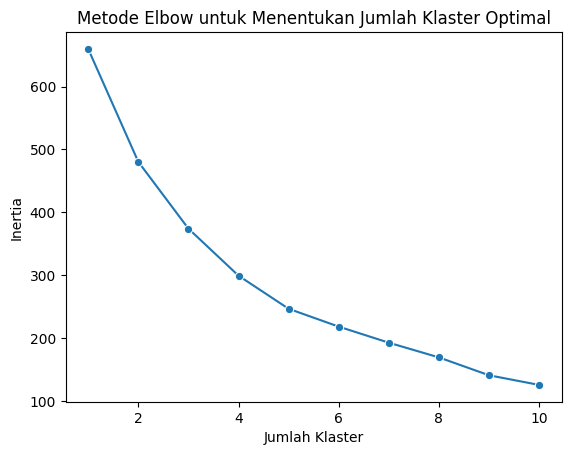

In [ ]:
# Plot kurva elbow menggunakan Seaborn
if len(inertia) == 10:
    elbow_data = pd.DataFrame({'Jumlah Klaster': range(1, 11), 'Inertia': inertia})
    sns.lineplot(data=elbow_data, x='Jumlah Klaster', y='Inertia', marker='o')
    plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal')
    plt.xlabel('Jumlah Klaster')
    plt.ylabel('Inertia')
    plt.show()
else:
    print("Data inertia tidak lengkap. Periksa proses looping.")


Next running 5 cluster

In [ ]:
# train the model with the determined cluster

algorithm = (KMeans(n_clusters = 5 ,init='k-means++' ,max_iter=300,
                        random_state= 111 ) )
algorithm.fit(X_scaled)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
df_feature.head()

,CO2 emissions from air transport per capita,CO2 emissions from air transport per unit of GDP,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Diesel tax rate,Energy intensity per capita,Renewable energy supply,Threatened bird species,Threatened mammal species,Threatened vascular plant species,Total energy supply
0,3.33,2.24,87.15,0.92,11.93,0.0,0.00,0.00,0.0,0.0,0.0,0.00
1,13.82,1.25,0.00,0.00,0.00,0.0,0.76,1071886.37,0.0,0.0,0.0,120.86
2,24.76,1.80,21.99,1.74,76.27,0.0,0.00,0.00,0.0,0.0,0.0,0.00
3,55.84,6.89,71.40,3.53,25.07,0.0,0.00,0.00,0.0,0.0,0.0,0.00
4,16.16,1.11,9.76,81.44,8.80,0.0,0.00,0.00,0.0,0.0,0.0,0.00


In [ ]:
pd.DataFrame(centroids1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.966692,3.544936,-0.479304,-0.315002,-0.264249,0.076147,2.023369,-0.370075,1.187593,-0.952422,0.784604,-0.144744
1,-0.151687,-0.120230,-0.362595,0.006936,0.261211,0.761704,0.264566,-0.004767,0.629864,0.723350,0.525260,0.049634
2,-0.429812,-0.474952,1.977989,-0.092613,-1.242476,-1.096516,-0.937192,-0.453189,-1.094399,-1.005188,-0.891664,-0.581769
3,-0.328313,-0.283235,0.030459,0.082974,0.007409,-1.055280,-0.656399,-0.084164,-1.045426,-0.911596,-0.823085,-0.284542
4,0.154089,0.070329,-0.009064,0.047992,0.300125,-0.671265,1.462036,5.234828,-0.210926,0.861839,-0.415361,6.703976


In [ ]:
pd.DataFrame(labels1)

,0
0,2
1,3
2,3
3,2
4,3
5,3
6,1
7,1
8,1
9,3


In [ ]:
df_feature['cluster'] = labels1
df_feature.head()

,CO2 emissions from air transport per capita,CO2 emissions from air transport per unit of GDP,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Diesel tax rate,Energy intensity per capita,Renewable energy supply,Threatened bird species,Threatened mammal species,Threatened vascular plant species,Total energy supply,cluster
0,3.33,2.24,87.15,0.92,11.93,0.0,0.00,0.00,0.0,0.0,0.0,0.00,2
1,13.82,1.25,0.00,0.00,0.00,0.0,0.76,1071886.37,0.0,0.0,0.0,120.86,3
2,24.76,1.80,21.99,1.74,76.27,0.0,0.00,0.00,0.0,0.0,0.0,0.00,3
3,55.84,6.89,71.40,3.53,25.07,0.0,0.00,0.00,0.0,0.0,0.0,0.00,2
4,16.16,1.11,9.76,81.44,8.80,0.0,0.00,0.00,0.0,0.0,0.0,0.00,3


In [ ]:
df_normalize = df_scaled.copy()
df_normalize['cluster'] = labels1
df_normalize.groupby('cluster').mean()

,CO2 emissions from air transport per capita,CO2 emissions from air transport per unit of GDP,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Diesel tax rate,Energy intensity per capita,Renewable energy supply,Threatened bird species,Threatened mammal species,Threatened vascular plant species,Total energy supply
cluster,,,,,,,,,,,,
0,3.966692,3.544936,-0.479304,-0.315002,-0.264249,0.076147,2.023369,-0.370075,1.187593,-0.952422,0.784604,-0.144744
1,-0.151687,-0.120230,-0.362595,0.006936,0.261211,0.761704,0.264566,-0.004767,0.629864,0.723350,0.525260,0.049634
2,-0.429812,-0.474952,1.977989,-0.092613,-1.242476,-1.096516,-0.937192,-0.453189,-1.094399,-1.005188,-0.891664,-0.581769
3,-0.328313,-0.283235,0.030459,0.082974,0.007409,-1.055280,-0.656399,-0.084164,-1.045426,-0.911596,-0.823085,-0.284542
4,0.154089,0.070329,-0.009064,0.047992,0.300125,-0.671265,1.462036,5.234828,-0.210926,0.861839,-0.415361,6.703976


,0
CO2 emissions from air transport per capita,"Axes(0.125,0.814746;0.065678x0.0652542)"
CO2 emissions from air transport per unit of GDP,"Axes(0.203814,0.814746;0.065678x0.0652542)"
Consumption of biomass,"Axes(0.282627,0.814746;0.065678x0.0652542)"
Consumption of metals,"Axes(0.361441,0.814746;0.065678x0.0652542)"
Consumption of non-metallic minerals,"Axes(0.440254,0.814746;0.065678x0.0652542)"
Diesel tax rate,"Axes(0.519068,0.814746;0.065678x0.0652542)"
Energy intensity per capita,"Axes(0.597881,0.814746;0.065678x0.0652542)"
Renewable energy supply,"Axes(0.676695,0.814746;0.065678x0.0652542)"
Threatened bird species,"Axes(0.755508,0.814746;0.065678x0.0652542)"
Threatened mammal species,"Axes(0.834322,0.814746;0.065678x0.0652542)"


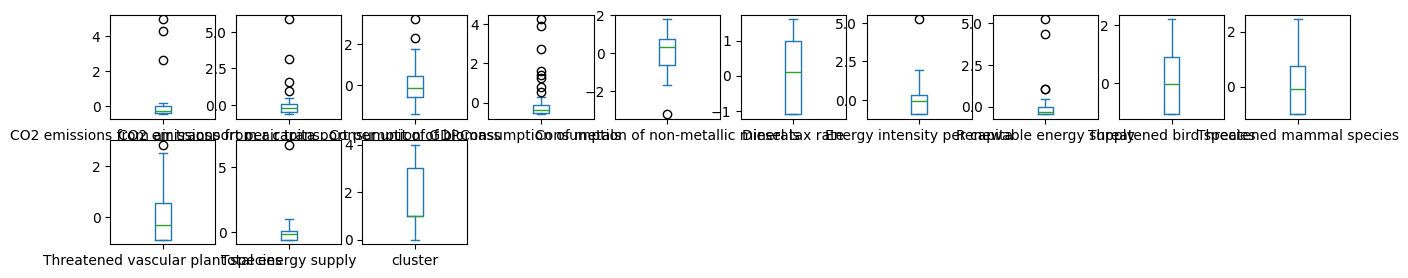

In [ ]:
#cheking outliers code
df_normalize.plot(kind="box", subplots=True, layout = (10,10),figsize=(16,16))

In [ ]:
#mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/LatihanSC/

/content/drive/MyDrive/LatihanSC


In [ ]:
#write data
df_feature.to_csv('/content/drive/MyDrive/LatihanSC//Cluster_Awal.csv', mode='a', index=False, header = True)

# coba DBScan

In [ ]:
df_DBScan = data.copy()

In [ ]:
df_DBScan

,Reference area,Status Area,CO2 emissions from air transport per capita,CO2 emissions from air transport per unit of GDP,Consumption of biomass,Consumption of metals,Consumption of non-metallic minerals,Diesel tax rate,Energy intensity per capita,Renewable energy supply,Threatened bird species,Threatened mammal species,Threatened vascular plant species,Total energy supply
0,Afghanistan,Non OECD,3.33,2.24,87.15,0.92,11.93,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00
1,Albania,Non OECD,13.82,1.25,0.00,0.00,0.00,0.00,0.76,1.071886e+06,0.00,0.00,0.00,120.86
2,Algeria,Non OECD,24.76,1.80,21.99,1.74,76.27,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00
3,Argentina,Non OECD,55.84,6.89,71.40,3.53,25.07,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00
4,Armenia,Non OECD,16.16,1.11,9.76,81.44,8.80,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00
5,Aruba,Non OECD,0.00,0.00,1.16,1.73,97.10,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00
6,Australia,OECD,510.69,10.01,30.97,39.85,29.19,0.26,4.99,1.320017e+07,19.42,29.33,5.37,260.55
7,Austria,OECD,441.10,8.49,29.39,6.10,64.51,0.47,3.33,1.084286e+07,28.82,25.96,35.76,136.48
8,Belgium,OECD,225.96,4.47,44.99,8.67,46.33,0.57,4.02,5.009301e+06,27.78,21.43,23.27,128.29
9,Brazil,Non OECD,54.27,4.34,65.55,5.48,28.97,0.00,1.44,1.520065e+08,0.00,0.00,0.00,477.68


In [ ]:
numeric_cols = data.select_dtypes(include=['float64']).columns
df_DBScan = data[numeric_cols]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_DBScan)

In [ ]:
# Membuat model DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Atur nilai eps dan min_samples sesuai data Anda
dbscan.fit(data_scaled)


DBSCAN()

In [ ]:
data['Cluster'] = dbscan.labels_


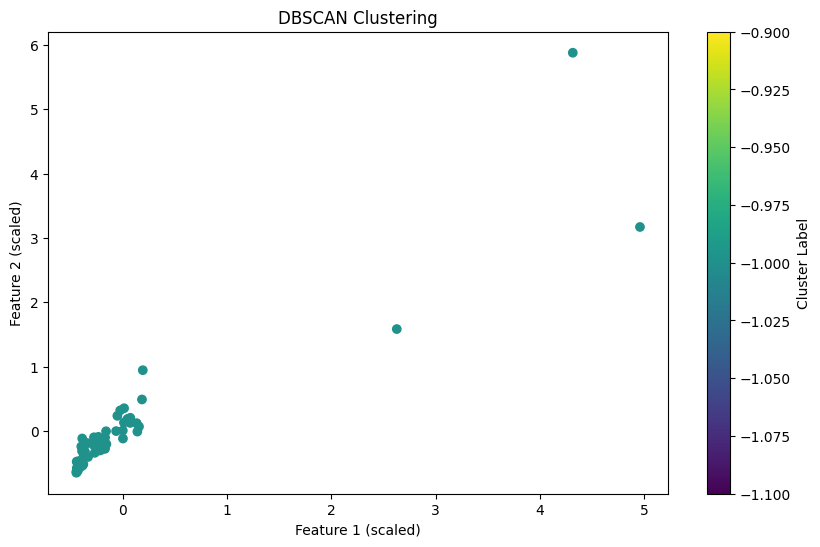

In [ ]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0],data_scaled[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
print(data['Cluster'].value_counts())


Cluster
-1    55
Name: count, dtype: int64


In [ ]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True


In [ ]:
for cluster_id in set(data['Cluster']):
    if cluster_id != -1:  # Kecuali outliers
        cluster_data = data[data['Cluster'] == cluster_id]
        print(f"Cluster {cluster_id}:")
        print(cluster_data.head())


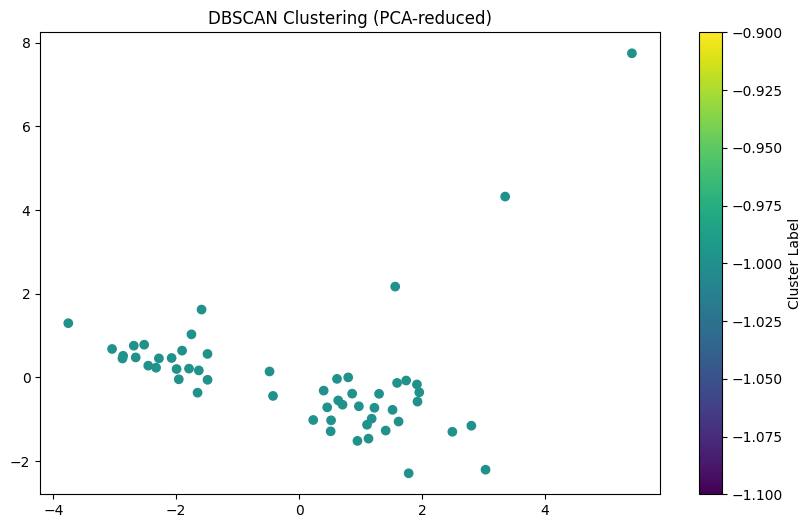

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering (PCA-reduced)')
plt.colorbar(label='Cluster Label')
plt.show()


In [ ]:
cluster_centers = (
    data[data['Cluster'] != -1]  # Kecuali outliers
    .groupby('Cluster')
    .mean()
)
print(cluster_centers)


Empty DataFrame
Columns: [Reference area, Status Area, CO2 emissions from air transport per capita, CO2 emissions from air transport per unit of GDP, Consumption of biomass, Consumption of metals, Consumption of non-metallic minerals, Diesel tax rate, Energy intensity per capita, Renewable energy supply, Threatened bird species, Threatened mammal species, Threatened vascular plant species, Total energy supply]
Index: []
